In [1]:
import matplotlib.pyplot as plt
# Import necessary libraries
import pandas as pd

plt.style.use("ggplot")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from exploratory_analysis.data_cleaning import display_dataset_info
from exploratory_analysis.data_visualization import visualize_missing_values
from exploratory_analysis.data_visualization import plot_numeric_distributions
from exploratory_analysis.data_visualization import plot_correlation_matrix
from exploratory_analysis.data_visualization import plot_boxplots_by_default

# Load dataset
data = pd.read_csv('data/train.csv')

# Display first few rows
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [2]:
display_dataset_info(data)

Data set Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  ob

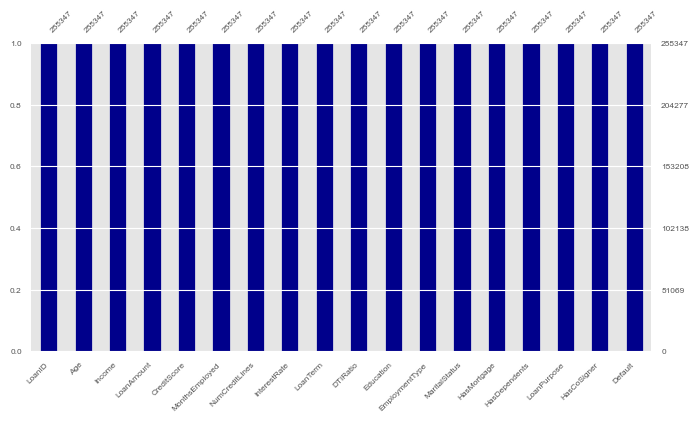

In [3]:
visualize_missing_values(data)

# **Observations:**
The visualization represents data completeness across various features. All features exhibit full bars, indicating there are no missing values in the dataset.

# **Categorize Features:**
Let's categorize the features into numerical and categorical.

In [4]:
num_cols = ["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed",
            "NumCreditLines", "InterestRate", "LoanTerm", "DTIRatio"]

cat_cols = ["Default", "Education", "EmploymentType", "MaritalStatus",
            "HasMortgage", "HasDependents", "LoanPurpose", "HasCoSigner"]

print(f"Numerical Columns: {num_cols}")
print(f"Categorical Columns: {cat_cols}")

Numerical Columns: ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
Categorical Columns: ['Default', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']


# **Distribution of Quantitative Variables:**
Let's plot the distribution of the numerical variables.

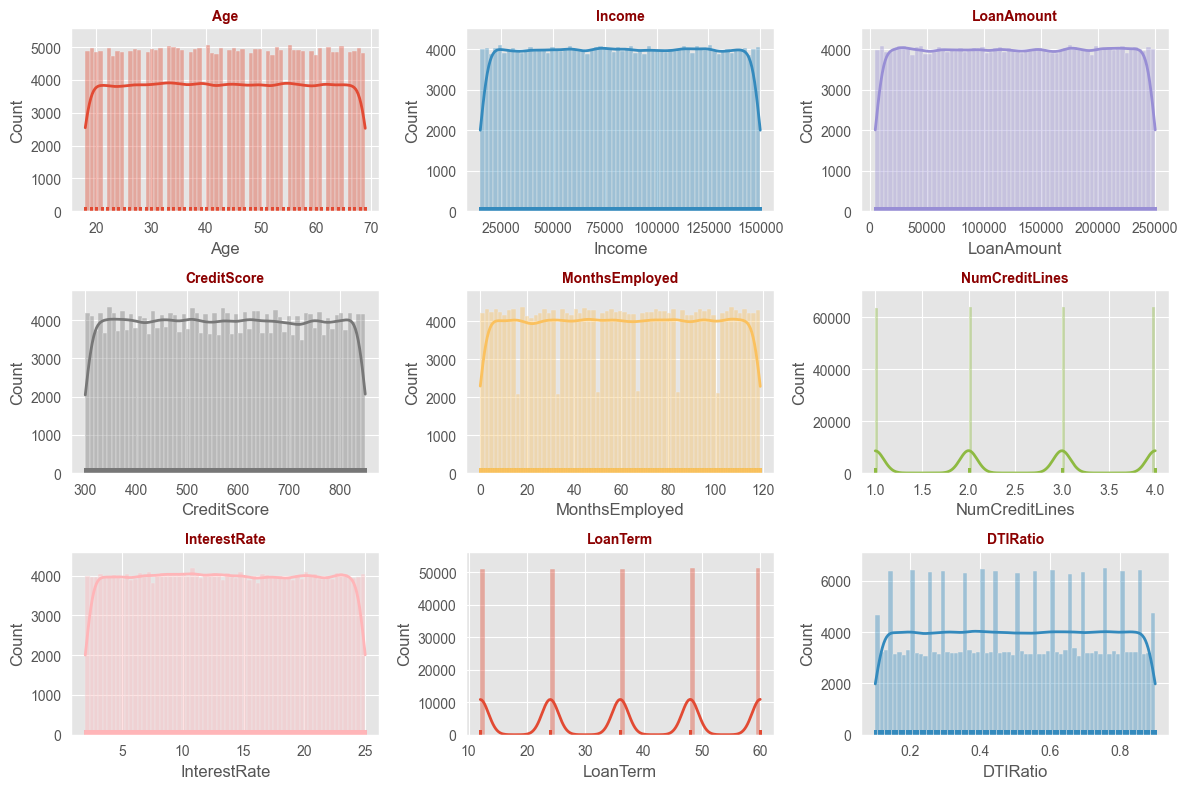

In [5]:
plot_numeric_distributions(data, num_cols)

# **Observations:**

1. **Age**: Majority of individuals are aged between 20 and 60, with a decline in counts as age increases.
2. **Income**: Most individuals earn between  25,000  and 150,000, showing a fairly uniform distribution.
3. **LoanAmount**: Loans are mainly distributed between 0 and 250,000 with few variations.
4. **CreditScore**: Most credit scores lie between 500 and 800, with a few outliers below 500.
5. **MonthsEmployed**: Distribution is fairly uniform between 0 and 120 months, suggesting a varied employment history among individuals.
6. **NumCreditLines**: Sharp peaks at 1, 2, 3, and 4 credit lines, indicating most individuals have 1 to 4 lines of credit.
7. **InterestRate**: Rates predominantly range between 5% and 25%, with a fairly even spread.
8. **LoanTerm**: Distinct peaks at intervals, suggesting common loan term durations (e.g., 10, 20, 30 years).
9. **DTIRatio**: Majority lie between 0.2 and 0.8, indicating varied debt-to-income ratios among individuals.

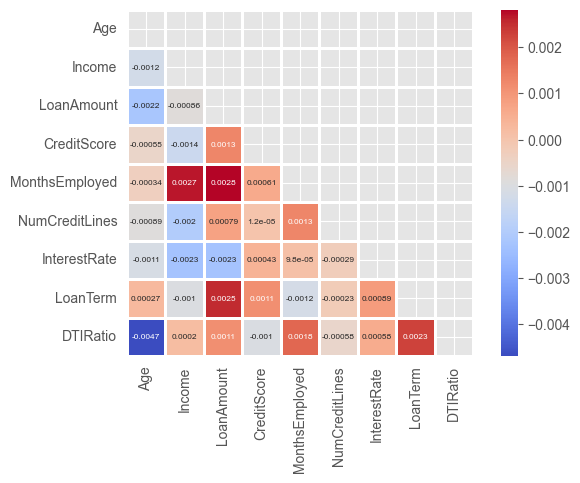

In [6]:
plot_correlation_matrix(data, num_cols)

# **Observations:**

1. **Age & Income**: Slight negative correlation, indicating older individuals might have slightly lower incomes.
2. **LoanAmount & CreditScore**: A very weak positive correlation exists, suggesting higher loan amounts might be associated with slightly better credit scores.
3. **MonthsEmployed & Age**: Positive correlation observed, implying longer employment durations are linked with older ages.
4. **NumCreditLines & LoanTerm**: A weak positive correlation, suggesting individuals with more credit lines might have longer loan terms.
5. **InterestRate & LoanAmount**: Slight negative correlation, implying larger loan amounts might have marginally lower interest rates.
6. **DTIRatio & Income**: Minor negative correlation, suggesting higher incomes might be associated with slightly lower debt-to-income ratios.

Most variables have very weak correlations with each other, implying that individual features are largely independent in this dataset.

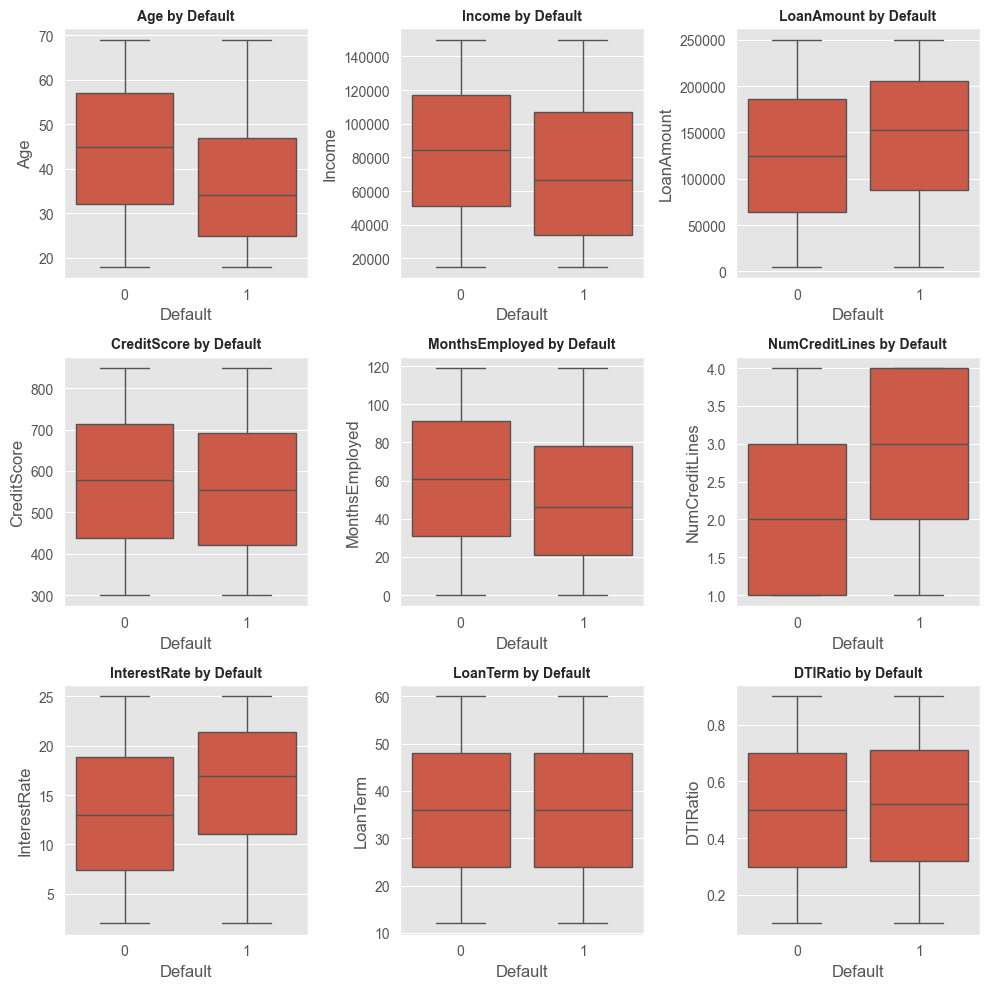

In [7]:
plot_boxplots_by_default(data, num_cols)

# **Observations:**

1. **Age by Default**: There's little variation between the age distribution for both default statuses. Both groups (Default 0 and 1) have similar median ages.
2. **Income by Default**: The median income for both groups is roughly similar, but those who default (1) seem to have a slightly tighter interquartile range (IQR) than those who don't (0).
3. **LoanAmount by Default**: Both defaulting and non-defaulting groups display similar loan amount medians and distributions.
4. **CreditScore by Default**: Defaulters (1) have a slightly lower median credit score than non-defaulters (0), with a comparable IQR.
5. **MonthsEmployed by Default**: The number of months employed is approximately the same for both groups, with a marginally smaller IQR for defaulters.
6. **NumCreditLines by Default**: Defaulters (1) appear to have a slightly higher median number of credit lines than non-defaulters (0).
7. **InterestRate by Default**: The interest rate is almost identical for both groups in terms of the median and distribution.
8. **LoanTerm by Default**: Both defaulting and non-defaulting groups have nearly identical loan term distributions and medians.
9. **DTIRatio by Default**: The debt-to-income ratio is consistent between the two groups with roughly equivalent medians and IQRs.

In summary, while there are slight differences in some features (like CreditScore and NumCreditLines) between defaulters and non-defaulters, most quantitative variables exhibit similar distributions for both groups.

# **Features to consider:**

Features to Consider:

CreditScore: The slight difference in median credit scores between defaulters and non-defaulters suggests this might be an important predictor.

NumCreditLines: Defaulters seemed to have a marginally higher number of credit lines. This could be indicative of some risk behavior, and thus, worth considering in the model.

Income: While the median income for both groups was similar, the IQR was tighter for defaulters. Income, being a critical financial attribute, should be considered.

MonthsEmployed: Employment duration can sometimes be correlated with financial stability. While the difference between the groups wasn't substantial, this feature might still be useful, especially in combination with others.

LoanAmount: The amount of loan might play a role in determining the default risk. Higher loan amounts could indicate higher repayment amounts and potential financial strain.

DTIRatio (Debt-to-Income Ratio): This metric, even though visually similar for both groups, is typically important in financial models. A higher DTI ratio can indicate that a person may have trouble meeting monthly payments.

InterestRate: Even if the distributions were similar, interest rates can heavily impact a person's ability to repay, especially if combined with other features.

Age: While there wasn't a substantial difference between the groups, age might play a role when combined with other features, representing the life stage or financial maturity of an individual.

LoanTerm: The term of a loan might impact the likelihood of default, especially when combined with other attributes.